In [1]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import matplotlib.colors as mcolors

In [2]:
T_Jupiter = 0.41351
T_Europa = 3.551181
T_Ganymede = 7.15455296 

T_Syn_Europa = T_Jupiter*T_Europa/numpy.abs(T_Jupiter-T_Europa)
T_Syn_Ganymede = T_Jupiter*T_Ganymede/numpy.abs(T_Jupiter-T_Ganymede)
print(T_Syn_Europa*24, T_Syn_Ganymede*24)

11.232144009821297 10.53301411800384


In [3]:
def calculate_and_plot_LS_distrib(t_observed, y_observed, Period_exoplanet, main_title, real_data = False, x_zoomin = None, y_zoomin = None, add_p_values = None, add_extra_T = None, log_x_scale = False, savefig = False, filename_savedfile = 'LS_plot.pdf'):
    # x_zoomin and y_zoomin: either None, or [min, max]
    # add_extra_T needs to be a dictionnary like: {T_value: float, T_name: string}/
    #     e.g., add_extra_T = {
    #                           'Europa': {'T_value': 11.2321, 'T_name': 'Europa'},
    #                           'Ganymede': {'T_value': 10.5330, 'T_name': 'Ganymede'}
    #                          }

    if add_p_values != None:
        if add_p_values.lower() == 'p-test':
            (frequency_LS, power_LS, confidence_level) = randomization_test(t_observed, y_observed, Period_exoplanet)
            confidence_level_labels = numpy.array([50, 90, 95, 99, 99.9])
        if add_p_values.lower() == 'from_ls':
            (frequency_LS, power_LS, fap_levels, confidence_level) = randomization_test_using_LS_package(t_observed, y_observed, Period_exoplanet, method = 'baluev')
            confidence_level_labels = numpy.array([99.9, 99, 95, 90, 50])
    else:
        (frequency_LS, power_LS) = calculate_LS_periodogram(t_observed, y_observed, Period_exoplanet)

    
    T_Synodic_Io = 0.5394862621777665 * 24 * 3600
    T_Jupiter = 9.95*3600
    T_Moon = 1.035050109661509 * 24 *3600
    T_Day = 0.99726968 * 24 * 3600

    fig, ax = plt.subplots()
    ax.plot(1/frequency_LS/60/60, power_LS)
    
    if add_p_values:
        ax.plot

    if x_zoomin != None:
        x_min = x_zoomin[0]
        x_max = x_zoomin[1]
    else:
        x_min = 1.1
        x_max = 70
    ax.set_xlim(x_min,x_max)
    if y_zoomin != None:
        y_min = y_zoomin[0]
        y_max = y_zoomin[1]
    else:
        y_min = -0.1*numpy.max(power_LS)
        y_max = 1.7*numpy.max(power_LS)
    ax.set_ylim(y_min,y_max)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.set_xlabel("Period (hours)")
    ax.set_ylabel("LS Power")
    ax.set_title(main_title)

    #ax.annotate("", xy=(T_Jupiter/60/60, 1.1*numpy.max(power_LS)), xytext=(T_Jupiter/60/60, 1.25*numpy.max(power_LS)),
    #            arrowprops=dict(arrowstyle="->", color="darkgreen"))

    #ax.annotate(r"T$_{Jupiter}$", xy=(T_Jupiter/60/60,  1.3*numpy.max(power_LS)),
    #            ha='center', va='bottom',
    #            color="darkgreen")
    if real_data != True :
        T_title = r"T$_{input}$"
    else:
        T_title = r"T$_{Io}$"
    ax.annotate("", xy=(Period_exoplanet, 1.1*numpy.max(power_LS)), xytext=(Period_exoplanet, 1.4*numpy.max(power_LS)),
                arrowprops=dict(arrowstyle="->", color="dodgerblue"))
    ax.annotate(T_title, xy=(Period_exoplanet, 1.4*numpy.max(power_LS)),
                ha='left', va='bottom',
                color="dodgerblue")

    if add_extra_T != None:
        ind_extra_T = 0
        for ind, value in add_extra_T.items():
            ind_extra_T=ind_extra_T+1
            ax.annotate("",
                 xy=(value['T_value'], 1.1*numpy.max(power_LS)),
                 xytext=(value['T_value'], (1.4+ind_extra_T*0.1)*numpy.max(power_LS)),
                 arrowprops=dict(arrowstyle="->", color="dodgerblue"))
            T_title = r"T$_{"+f"{value['T_name']}"+r"}$"
            ax.annotate(T_title,
                 xy=(value['T_value'], (1.4+ind_extra_T*0.1)*numpy.max(power_LS)),
                 ha='left', va='bottom',
                 color="dodgerblue")
    
    if log_x_scale:
        ax.set_xscale("log", base=10)

    #plt.tight_layout()
    if add_p_values:
        # Plot the confidence levels
        for i, conf_level in enumerate(confidence_level):
            ax.axhline(y=conf_level, color='C{}'.format(i+1), linestyle='--', label=f'{confidence_level_labels[i]}%')
        ax.legend(title = "Confidence Level")
        if savefig:
                plt.savefig(filename_savedfile, format='pdf', transparent = True, dpi='figure')
        return(frequency_LS, power_LS, confidence_level)
    else:
        if savefig:
            plt.savefig(filename_savedfile, format='pdf', transparent = True, dpi='figure')
        return(frequency_LS, power_LS)
    
    #ax.annotate("", xy=(T_Moon/60/60, 1.35*numpy.max(power_LS)), xytext=(T_Moon/60/60, 1.5*numpy.max(power_LS)),
    #            arrowprops=dict(arrowstyle="->", color="slategray"))

    #ax.annotate(r"T$_{Moon}$", xy=(T_Moon/60/60, 1.5*numpy.max(power_LS)),
    #            ha='center', va='bottom',
    #            color="slategray")
                
    #ax.annotate("", xy=(T_Day/60/60, 1.1*numpy.max(power_LS)), xytext=(T_Day/60/60, 1.25*numpy.max(power_LS)),
    #            arrowprops=dict(arrowstyle="->", color="orange"))

    #ax.annotate(r"T$_{Sun}$", xy=(T_Day/60/60, 1.3*numpy.max(power_LS)),
    #            ha='center', va='bottom',
    #            color="orange")


In [4]:
import numpy
from astropy.timeseries import LombScargle as LombScargle_astropy

def calculate_LS_periodogram(time, signal, exoplanet_period_in_hours, ls_object = False):

    nout=100000
    T_exoplanet = numpy.mean(exoplanet_period_in_hours)*60*60 # T needs to be in seconds #numpy.mean() is taken, in case T_exoplanet is a list
    T1 = T_exoplanet/10     # Period min
    T2 = T_exoplanet*10     # Period max
    w1 = 2*numpy.pi/T1      # Pulsation max
    w2 = 2*numpy.pi/T2      # Pulsation min
    #f_LS = numpy.logspace(numpy.log10(w2), numpy.log10(w1), nout)  / (2 * numpy.pi) #Frequencies at which to search for periodicity with LombScargle
    f_LS = numpy.linspace(w2, w1, nout)  / (2 * numpy.pi) #Frequencies at which to search for periodicity with LombScargle


    normalization='standard'
    method = 'auto'
    fit_mean = False # improve the accuracy of results, especially in the case of incomplete phase coverage
    center_data = False 
    
    ls_tmp = LombScargle_astropy(time, signal, fit_mean = fit_mean)
    frequency_LS, power_LS = ls_tmp.autopower(method = method, minimum_frequency = f_LS[0], maximum_frequency = f_LS[-1], samples_per_peak=100)
        
    #frequency_LS, power_LS = LombScargle_astropy(time, signal, fit_mean = fit_mean, normalization= normalization).autopower(method = method, minimum_frequency = f_LS[0], maximum_frequency = f_LS[-1], samples_per_peak=100)
    
    if ls_object:
        return ls_tmp, frequency_LS, power_LS
    else:
        return frequency_LS, power_LS


In [5]:
def LS_calculation(time, data, threshold, normalized_LS = False, log_infos = False, type_LS = "scipy"):
    """
    Calculate LombScargle periodogram for given time[nt] and data[nt] computed Dask array (so for a specific frequency and Stokes parameter).

    Parameters:
    - time (1D array)
    - data (1D array)
    
    Returns:
    - f_LS: frequency of the LS periodogram
    - power_LS: power of the LS periodogram
    """
    stokes = 'VI'
    nout= 100000
    T_exoplanet = 1.7708333333333333*24*60*60 #0.5394862621777665*24*60*60 # T needs to be in seconds #numpy.mean() is taken, in case T_exoplanet is a list
    T1 = T_exoplanet/10     # Period min
    T2 = T_exoplanet*10     # Period max
    w1 = 2*numpy.pi/T1      # Pulsation max
    w2 = 2*numpy.pi/T2      # Pulsation min
    #f_LS = numpy.logspace(numpy.log10(w2), numpy.log10(w1), nout)  / (2 * numpy.pi) #Frequencies at which to search for periodicity with LombScargle
    f_LS = numpy.linspace(w2, w1, nout)  / (2 * numpy.pi) #Frequencies at which to search for periodicity with LombScargle
    if stokes == 'V+':
        data[data < 0] = 0
    if stokes == 'V-':
        data[data > 0] = 0
    if stokes == 'V':
        data = numpy.abs(data)
    if stokes == 'VI':
        data[numpy.abs(data) > 1] = numpy.nan # unphysical points
        if threshold != None:
            data[numpy.abs(data) < threshold] = 0 # remove points <threshold
            data[numpy.abs(data) >= threshold] = 1 # put every point > threshold at 1
        
        data = numpy.abs(data)

    data[numpy.isnan(data)] = 0
    data[numpy.isinf(data)] = 0

    
    if type_LS.lower() == 'scipy':
        power_LS = LombScargle_scipy(time, data, f_LS, normalize=normalized_LS)
    if type_LS.lower() == 'astroml':
        power_LS = LombScargle_astroML(time, data, f_LS)
    if type_LS.lower() == 'astropy':
        #time in jd Time(data)
        if normalized_LS:
            normalization='standard' # default normalized_power = power/mean(data**2)
            normalization='model' # normalized_data = (data - mean(data))/std(data) &  normalized_power = power/mean(normalized_data**2)
        else:
            normalization='standard' #(default)
        
        method = 'auto'
        #method = 'slow' #   This method uses a slower but more accurate implementation of the Lomb-Scargle algorithm suitable for unevenly sampled data. It's based on the work of Lomb (1976) and Scargle (1982).
                            #   The 'slow' method is suitable for datasets with irregular sampling intervals or when high accuracy is required.
        #method = 'chi2' #   This method computes the Lomb-Scargle periodogram using a chi-square statistic, which provides a robust estimate of the periodogram for unevenly sampled data.
                            #   The 'chi2' method is useful when dealing with datasets with significant measurement uncertainties or when you want a statistically robust estimate of the periodogram.

        #fit_mean:  Astropy's Lomb-Scargle implementation fits a constant mean to the data before computing the periodogram. This involves subtracting the mean value from the data, which effectively centers the data around zero.
        #           Fitting a mean to the data helps remove any systematic offsets or trends that may be present in the data, which can improve the accuracy of the periodogram.
        #           This option is useful when you want to focus on periodic variations in the data while removing any constant offset or trend.
        fit_mean = False

        frequency_LS, power_LS = LombScargle_astropy(time, data, fit_mean = fit_mean).autopower(method = method, minimum_frequency = f_LS[0], maximum_frequency = f_LS[-1], samples_per_peak=100)
        f_LS = frequency_LS
    
    return f_LS, power_LS


In [6]:
def randomization_test_using_LS_package(t_observed, y_observed, Period_exoplanet, method = 'baluev'):
    ls_object, frequency_LS, power_LS = calculate_LS_periodogram(t_observed, y_observed, Period_exoplanet, ls_object = True)
        
    # method : 'baluev', 'davies', 'naive', 'bootstrap'
    
    # Find the period corresponding to the peak power
    best_frequency = frequency_LS[numpy.argmax(power_LS)]
    best_period = 1 / best_frequency / 3600
    print(f"Best period: {best_period:.4f}")

    # Compute the False Alarm Probability (FAP) for all powers
    fap = ls_object.false_alarm_probability(power_LS, method = method)  # Pass the entire power array

    # Find the FAP for the peak power
    peak_fap = fap[numpy.argmax(power_LS)]
    print(f"False Alarm Probability (FAP) for peak: {peak_fap:.4e}")

    # Find power levels corresponding to specific FAP thresholds
    fap_levels = [0.50, 0.90, 0.95, 0.99, 0.999]
    false_alarm_levels = ls_object.false_alarm_level(fap_levels, method = method)
    for level, fap_level in zip(fap_levels, false_alarm_levels):
        print(f"Power threshold for FAP {level*100:.2f}%: {fap_level:.4f}")
    
    return(frequency_LS, power_LS, fap_levels, false_alarm_levels)

In [7]:
def randomization_test(t_observed, y_observed, Period_exoplanet, n_iterations = 100):
    max_powers_randomized = []

    frequency_LS, power_LS = calculate_LS_periodogram(t_observed, y_observed, Period_exoplanet)
    max_power_original = numpy.max(power_LS)
    for _ in range(n_iterations):
        # shuffle the values
        y_randomized = numpy.random.permutation(y_observed)

        # Compute the LS periodogram with shuffled data
        frequency_LS_randomized, power_LS_randomized = calculate_LS_periodogram(t_observed, y_randomized, Period_exoplanet)

        # Store the maximum power of the shuffled data
        max_powers_randomized.append(numpy.max(power_LS_randomized))

    # Calculate the confidence levels (percentiles)
    conf_levels = numpy.percentile(max_powers_randomized, [50, 90, 95, 99, 99.9])

    # Compute p-value or confidence level
    #p_value = numpy.sum(max_powers_randomized >= max_power_original) / n_iterations
    #confidence_level = 1 - p_value

    return(frequency_LS, power_LS, conf_levels)

In [3]:

def decrease_snr_of_signal(x_size, y_ini, sigma_bignoise):
    
    rng = numpy.random.default_rng(12345)
    # step 2: create a random normal noise
    std_ini = numpy.std(y_ini)
    noise = rng.normal(loc=0., scale=sigma_bignoise, size=x_size)
    # and add it to the "real signal"
    y_noisy = y_ini + noise
    std_noisy = numpy.std(y_noisy) 

    

    # Step 3: return new noiser signal to the same properties as the original one
    # this keep the real signal but increase SNR
    factor = std_noisy / std_ini
    y_low_snr = y_noisy / factor
    std_low_snr = numpy.std(y_low_snr)

    return (y_noisy, y_low_snr)

In [2]:
def resonance_between_frequencies(T_sin, T_obs, T_gap):
    print(f'T_sin: {T_sin:.4f}; T_obs: {T_obs:.4f}, T_gap: {T_gap:.4f}')
    print('Different combination:')
    T_syno_sin_obs = (T_sin*T_obs)/numpy.abs(T_sin - T_obs)
    T_syno_sin_gap = (T_sin*T_gap)/numpy.abs(T_sin - T_gap)
    T_syno_sin_2gap = (T_sin*2*T_gap)/numpy.abs(T_sin - 2*T_gap)
    T_syno_sin_3gap = (T_sin*3*T_gap)/numpy.abs(T_sin - 3*T_gap)
    T_syno_sin_4gap = (T_sin*4*T_gap)/numpy.abs(T_sin - 4*T_gap)
    print(f'Synodic Period between T_sin and T_obs: {T_syno_sin_obs:.3f}')
    print(f'Synodic Period between T_sin and T_gap: {T_syno_sin_gap:.3f}')
    print(f'Synodic Period between T_sin and 2xT_gap: {T_syno_sin_2gap:.3f}')
    print(f'Synodic Period between T_sin and 3xT_gap: {T_syno_sin_3gap:.3f}')
    print(f'Synodic Period between T_sin and 4xT_gap: {T_syno_sin_4gap:.3f}')
    
    T_syno_obs_gap = (T_obs*T_gap)/numpy.abs(T_obs - T_gap)
    T_syno_obs_2gap = (T_obs*2*T_gap)/numpy.abs(T_obs - 2*T_gap)
    T_syno_obs_3gap = (T_obs*3*T_gap)/numpy.abs(T_obs - 3*T_gap)
    T_syno_obs_4gap = (T_obs*4*T_gap)/numpy.abs(T_obs - 4*T_gap)
    print(f'Synodic Period between T_obs and T_gap: {T_syno_obs_gap:.3f}')
    print(f'Synodic Period between T_obs and 2xT_gap: {T_syno_obs_2gap:.3f}')
    print(f'Synodic Period between T_obs and 3xT_gap: {T_syno_obs_3gap:.3f}')
    print(f'Synodic Period between T_obs and 4xT_gap: {T_syno_obs_4gap:.3f}')

    T_harmonic_sin_obs = 1/(1/T_sin + 1/T_obs)
    print(f'Harmonic resonance between T_sin and T_obs:')
    print(f'f_sin + f_obs: {T_harmonic_sin_obs:.3f} hours')
    T_harmonic_sin_1gap = 1/(1/T_sin+1/T_gap)
    T_harmonic_sin_2gap = 1/(1/T_sin+2/T_gap)
    T_harmonic_sin_3gap = 1/(1/T_sin+3/T_gap)
    T_harmonic_sin_4gap = 1/(1/T_sin+4/T_gap)
    print(f'Harmonic resonance between T_sin and T_gap:')
    print(f'f_sin + f_gap: {T_harmonic_sin_1gap:.3f} hours')
    print(f'f_sin + 2 x f_gap: {T_harmonic_sin_2gap:.3f} hours')
    print(f'f_sin + 3 x f_gap: {T_harmonic_sin_3gap:.3f} hours')
    print(f'f_sin + 4 x f_gap: {T_harmonic_sin_4gap:.3f} hours')
    T_harmonic_obs_1gap = 1/(1/T_obs+1/T_gap)
    T_harmonic_obs_2gap = 1/(1/T_obs+2/T_gap)
    T_harmonic_obs_3gap = 1/(1/T_obs+3/T_gap)
    T_harmonic_obs_4gap = 1/(1/T_obs+4/T_gap)
    print(f'Harmonic resonance between T_obs and T_gap:')
    print(f'f_obs + f_gap: {T_harmonic_obs_1gap:.3f} hours')
    print(f'f_obs + 2 x f_gap: {T_harmonic_obs_2gap:.3f} hours')
    print(f'f_obs + 3 x f_gap: {T_harmonic_obs_3gap:.3f} hours')
    print(f'f_obs + 4 x f_gap: {T_harmonic_obs_4gap:.3f} hours')


In this first simulation, we produce a sinusoidal wave and keep randomly 2.65% of the wave

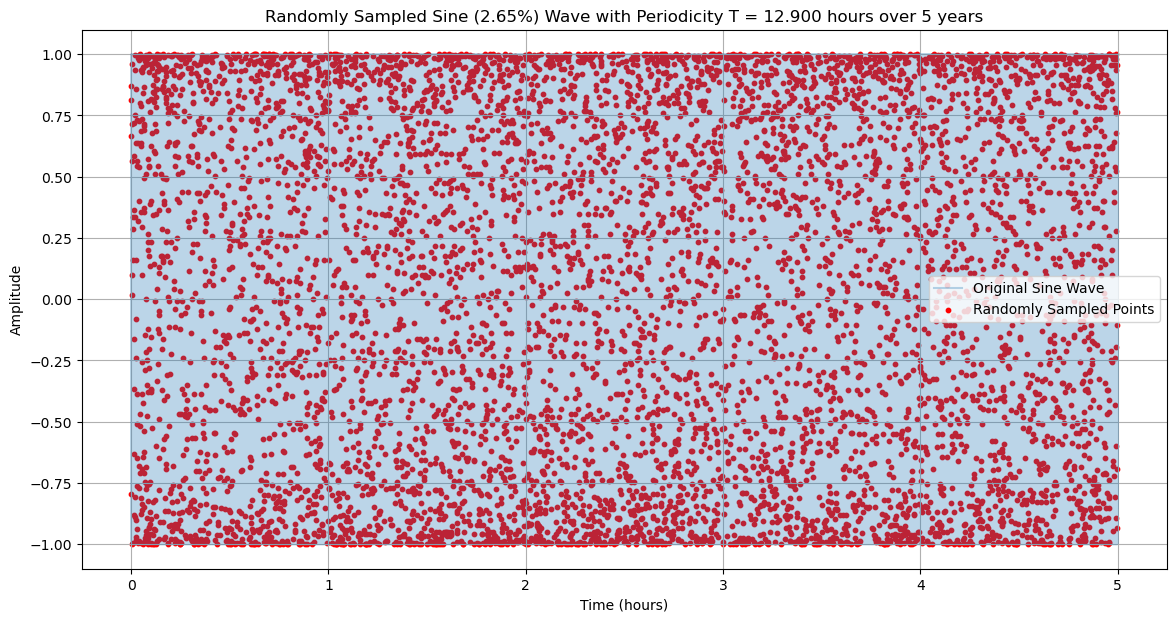

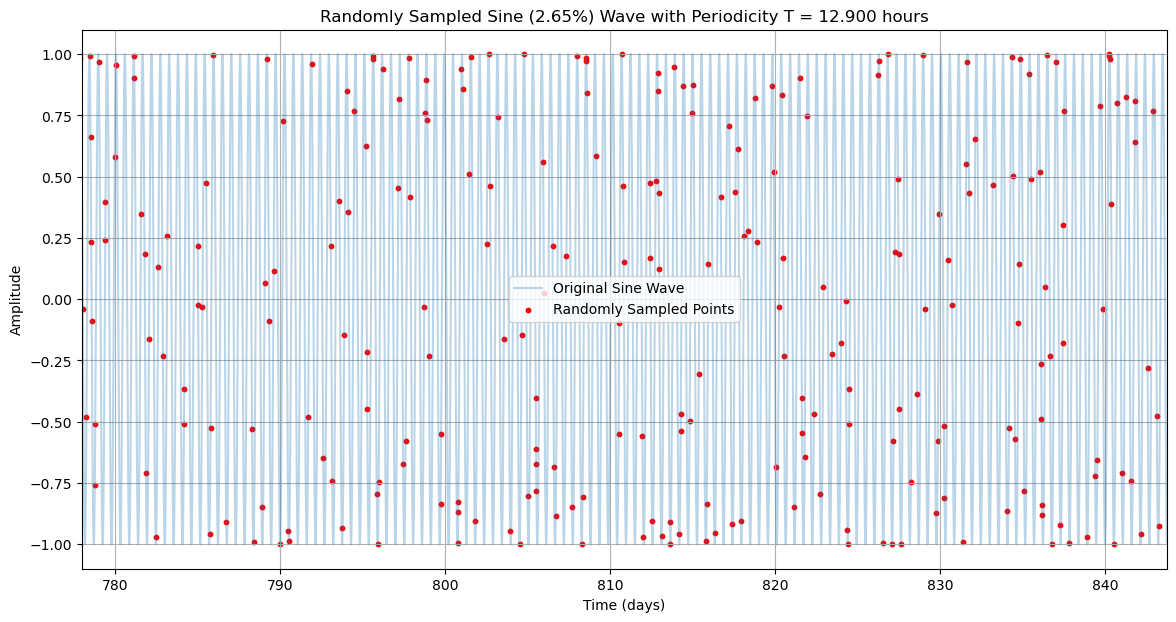

(array([2.15331611e-06, 2.15337950e-06, 2.15344290e-06, ...,
        2.15331454e-04, 2.15331518e-04, 2.15331581e-04]),
 array([3.84837003e-06, 3.66332108e-06, 3.50083572e-06, ...,
        1.62509898e-03, 1.63770051e-03, 1.64894799e-03]),
 array([0.00338116, 0.0039467 , 0.00406835, 0.00462779, 0.00524792]))

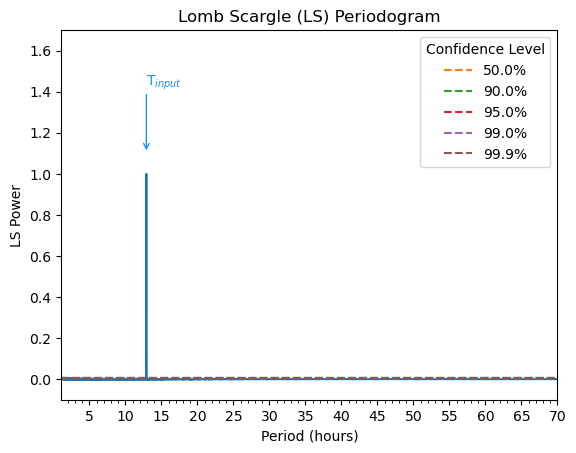

In [8]:


# Parameters
#T = 9.95 * 3600  # Period in seconds (9.95 hours)
T = 12.9 * 3600 #13 hours, so that it is close enough to Io synodic period
f = 1 / T  # Frequency
A = 1  # Amplitude
years = 5
duration = years * 365.25 * 24 * 3600  # Duration of the signal in seconds 
sampling_interval = 600  # Sampling interval in seconds (10 minutes to have same thing than our NenuFAR observations)

# Generate time points
t = numpy.arange(0, duration, sampling_interval)

# Generate sine wave
y = A * numpy.sin(2 * numpy.pi * f * t)

# Randomly sample the time points to create gaps
keep_fraction = 0.0265  # Fraction of points to keep
num_samples = int(keep_fraction * len(t))
random_indices = numpy.random.choice(len(t), num_samples, replace=False)
t_sampled = t[random_indices]
y_sampled = y[random_indices]

# Sort the sampled points by time (optional, for plotting purposes)
sorted_indices = numpy.argsort(t_sampled)
t_sampled = t_sampled[sorted_indices]
y_sampled = y_sampled[sorted_indices]

# Plot the original sine wave and the sampled points
plt.figure(figsize=(14, 7))
plt.plot(t/60/60/24/365.25, y, label='Original Sine Wave', alpha=0.3)
plt.scatter(t_sampled/60/60/24/365.25, y_sampled, color='red', s=10, label='Randomly Sampled Points')
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title(f'Randomly Sampled Sine ({keep_fraction*100:.2f}%) Wave with Periodicity T = {T/3600:.3f} hours over {years} years')
plt.legend()
plt.grid(True)
plt.savefig("randomly_spaced_sin_T.pdf", format='pdf', transparent = True, dpi='figure')
plt.show()

# Zoom in
plt.figure(figsize=(14, 7))
plt.plot(t/60/60/24, y, label='Original Sine Wave', alpha=0.3)
plt.scatter(t_sampled/60/60/24, y_sampled, color='red', s=10, label='Randomly Sampled Points')
plt.xlim(2.13*365.25, 2.31*365.25)
plt.xlabel('Time (days)')
plt.ylabel('Amplitude')
plt.title(f'Randomly Sampled Sine ({keep_fraction*100:.2f}%) Wave with Periodicity T = {T/3600:.3f} hours')
plt.legend()
plt.grid(True)

plt.savefig("randomly_spaced_sin_T_zoomin.pdf", format='pdf', transparent = True, dpi='figure')
plt.show()

calculate_and_plot_LS_distrib(t_sampled, y_sampled, T/3600, f"Lomb Scargle (LS) Periodogram", real_data = False, add_p_values='p-test',  savefig = True, filename_savedfile = 'LS_randomly_spaced_sin_T.pdf')



In this second simulation, we produce a sinusoidal wave and keep semi-regularly 2.65% of the wave in 125 intervals

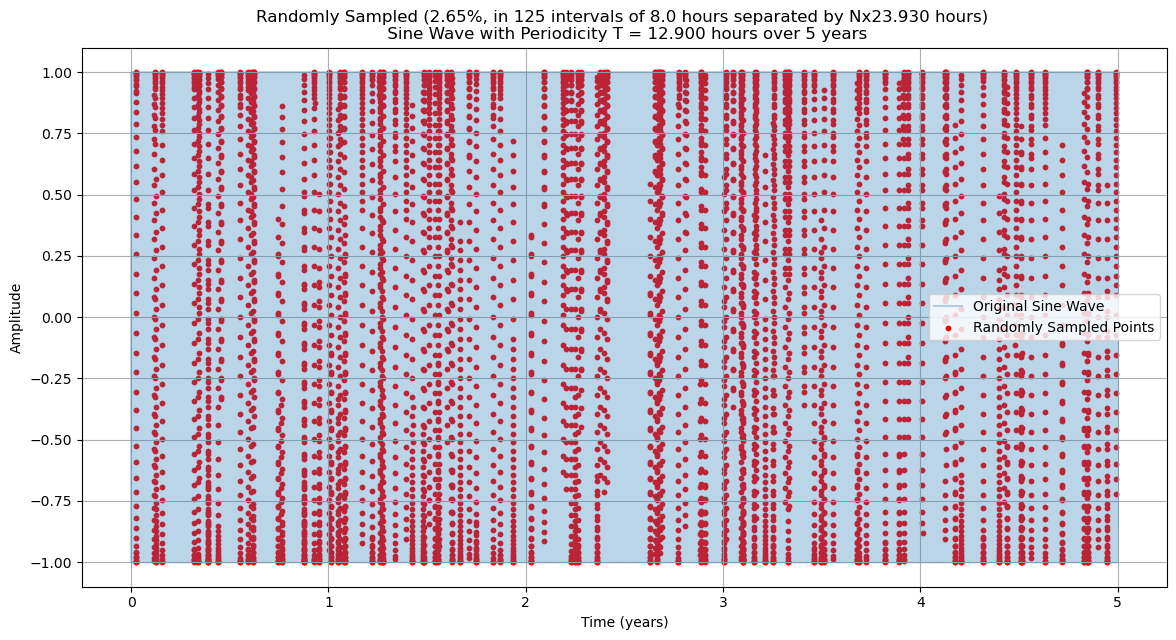

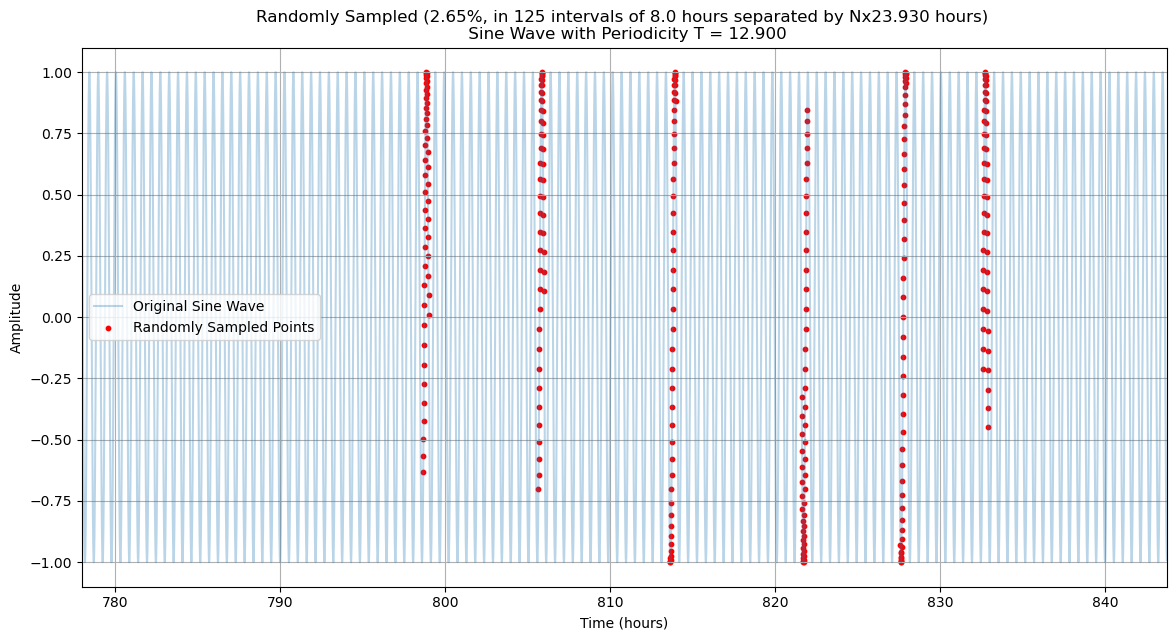

[28.00004956 27.99986948 27.9996894  27.99950933 27.99932926 27.99914919
 27.99896912 27.99878906 27.998609   27.99842894 27.99824888 27.99806882
 27.99788877 27.99770872 27.99752867 27.99734863 27.99716858 27.99698854
 27.9968085  27.99662847 27.99644843 27.9962684  27.99608837 27.99590834
 27.99572832 27.99554829 27.99536827 27.99518826 27.99500824 27.99482823
 27.99464822 27.99446821 27.9942882  27.9941082  27.99392819 27.9937482
 27.9935682  27.9933882  27.99320821 27.99302822 27.99284823 27.99266825
 27.99248826 27.99230828 27.9921283  27.99194833 27.99176835 27.99158838
 27.99140841 27.99122844 27.99104848 27.99086852 27.99068856 27.9905086
 27.99032864 27.99014869 27.98996874 27.98978879 27.98960884 27.9894289
 27.98924896 27.98906902 27.98888908 27.98870915 27.98852922 27.98834929
 27.98816936 27.98798943 27.98780951 27.98762959 27.98744967 27.98726975
 27.98708984 27.98690993 27.98673002 27.98655011 27.98637021 27.9861903
 27.9860104  27.98583051 27.98565061 27.98547072 27.985

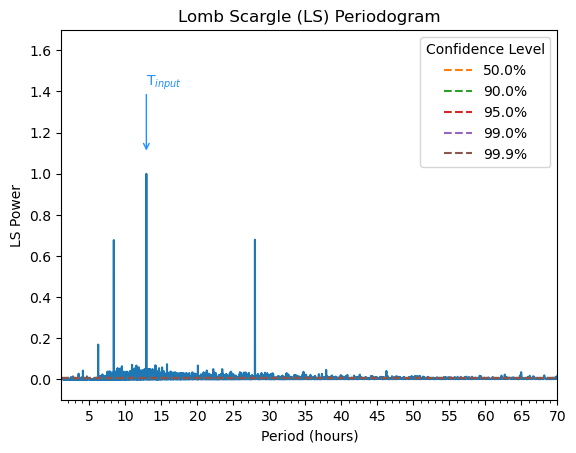

In [9]:
# Parameters
#T = 9.95 * 3600  # Period in seconds (9.95 hours)
T = 12.9 * 3600 # 9.5 *3600
f = 1 / T  # Frequency
A = 1  # Amplitude
years = 5
duration = years * 365.25 * 24 * 3600  # Duration of the signal in seconds (3 years)
sampling_interval = 600  # Sampling interval in seconds 


# Define observation and hole intervals
obs_period = 8 * 3600  # Observation period in seconds (8 hours)

#min_spread_between_two_obs_window = (16 * 3600) + (3 * 60 + 40)  #22*3600 # Minimum spread between observation windows in seconds (16 hours 3 minutes 40 seconds)
#min_spread_between_two_obs_window = (24 * 3600) - (3 * 60 + 40) 
min_spread_between_two_obs_window = 23.93*3600
num_windows = 125  # Number of observation windows

# Generate time points
t = numpy.arange(0, duration, sampling_interval)

# Generate sine wave
y = A * numpy.sin(2 * numpy.pi * f * t)



# Calculate maximum start time for observation windows
max_start_time = duration - obs_period

# Generate valid start times with the minimum spread constraint
valid_start_times = numpy.arange(0, max_start_time, min_spread_between_two_obs_window)
num_valid_start_times = len(valid_start_times)


# Randomly select start times for observation windows, ensuring minimum spread
rng = numpy.random.default_rng(12345)
selected_starts = numpy.sort(rng.choice(valid_start_times, num_windows, replace=False))


# Create a mask for observation periods
mask = numpy.zeros_like(t, dtype=bool)
for start in selected_starts:
    end_obs = start + obs_period
    mask[(t >= start) & (t < end_obs)] = True


t_observed = t[mask]
y_observed = y[mask]

# Plot the original sine wave and the sampled points
plt.figure(figsize=(14, 7))
plt.plot(t/60/60/24/365.25, y, label='Original Sine Wave', alpha=0.3)
plt.scatter(t_observed/60/60/24/365.25, y_observed, color='red', s=10, label='Randomly Sampled Points')
plt.xlabel('Time (years)')
plt.ylabel('Amplitude')
plt.title(f'Randomly Sampled ({keep_fraction*100:.2f}%, in {num_windows} intervals of {obs_period/3600} hours separated by Nx{min_spread_between_two_obs_window/3600:02.3f} hours) \n Sine Wave with Periodicity T = {T/3600:.3f} hours over {years} years')
plt.legend()
plt.grid(True)
plt.savefig("regularly_spaced_sin_T.pdf", format='pdf', transparent = True, dpi='figure')
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(t/60/60/24, y, label='Original Sine Wave', alpha=0.3)
plt.scatter(t_observed/60/60/24, y_observed, color='red', s=10, label='Randomly Sampled Points')
plt.xlim(2.13*365.25, 2.31*365.25)
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title(f'Randomly Sampled ({keep_fraction*100:.2f}%, in {num_windows} intervals of {obs_period/3600} hours separated by Nx{min_spread_between_two_obs_window/3600:02.3f} hours) \n Sine Wave with Periodicity T = {T/3600:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("regularly_spaced_sin_T_zoomin.pdf", format='pdf', transparent = True, dpi='figure')
plt.show()

(frequency_LS, power_LS, _) = calculate_and_plot_LS_distrib(t_observed, y_observed, T/3600, "Lomb Scargle (LS) Periodogram", add_p_values='p-test',  savefig = True, filename_savedfile = 'LS_regularly_spaced_sin_T.pdf')#f"Lomb Scargle (LS) Periodogram \n Randomly Sampled ({keep_fraction*100:.2f}%, in {num_windows} intervals  of {obs_period/3600} hours separated by Nx{min_spread_between_two_obs_window/3600}) \n Sine Wave with Periodicity T = {T/3600:.3f} hours over {years} years")

Peaks = 1/frequency_LS[power_LS > 0.1]/60/60
print(Peaks)


Test with all simulated data point at 1, to see only the effect of the windows, not the sinusoid

Then we do the same but with any values == 1


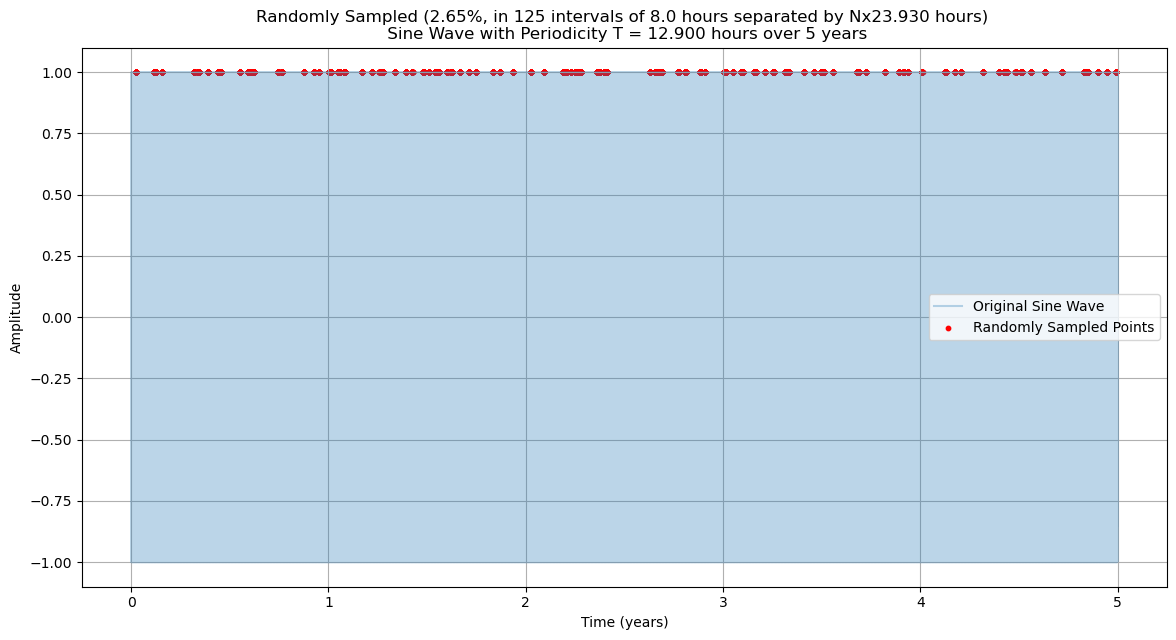

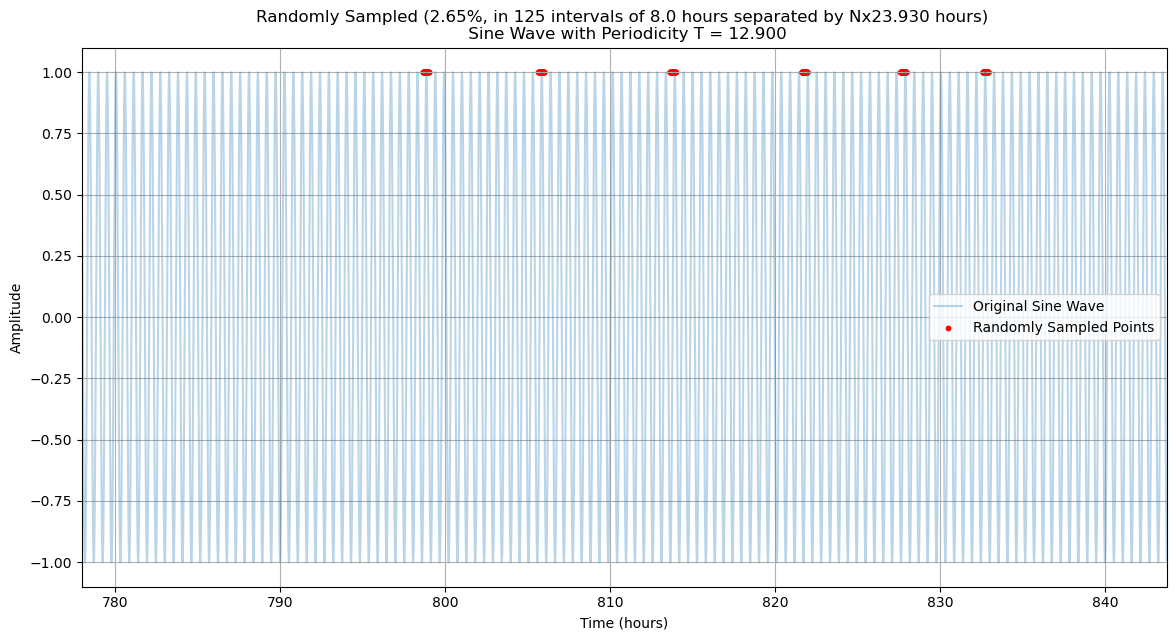

[107.2638683  107.26122563 107.25858309 107.25594068 107.2532984
 107.25065626 107.24801424 107.24537235 107.24273059 107.24008897
 107.23744747 107.2348061  107.23216487 107.22952376 107.22688278
 107.22424194 107.22160122 107.21896063 107.21632018 107.21367985
 107.21103965 107.20839959 107.20575965 107.20311985 107.20048017
 107.19784062 107.19520121 107.19256192 107.18992277 107.18728374
 107.18464484 107.18200608 107.17936744 107.17672893 107.17409056
 107.17145231 107.16881419 107.16617621 107.16353835 107.16090062
 107.15826302 107.15562556 107.15298822 107.15035101  70.91879746
  70.91764224  70.91648707  70.91533193  70.91417683  70.91302177
  70.91186674  70.91071175  70.9095568   70.90840189  70.90724702
  70.90609218  70.90493738  70.90378262  70.9026279   70.90147321
  70.90031856  70.89916395  70.89800937  70.89685484  70.89570034
  70.89454588  70.89339146  70.89223707  70.89108272  70.88992841
  70.88877414  70.8876199   70.88646571  70.88531155  70.88415742
  70.883003

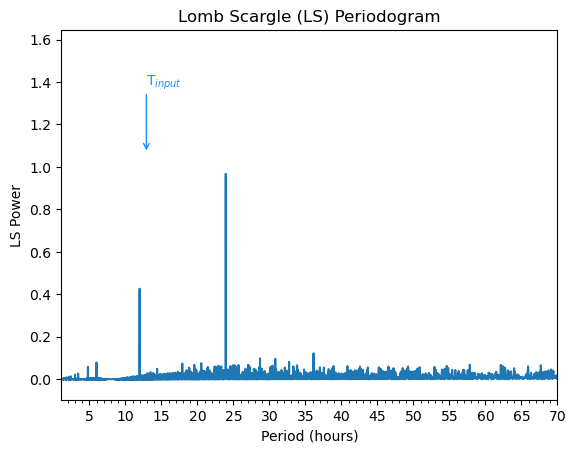

In [13]:

print('Then we do the same but with any values == 1')


y_observed_1 = y_observed

y_observed_1[:] = 1

# Plot the original sine wave and the sampled points
plt.figure(figsize=(14, 7))
plt.plot(t/60/60/24/365.25, y, label='Original Sine Wave', alpha=0.3)
plt.scatter(t_observed/60/60/24/365.25, y_observed_1, color='red', s=10, label='Randomly Sampled Points')
plt.xlabel('Time (years)')
plt.ylabel('Amplitude')
plt.title(f'Randomly Sampled ({keep_fraction*100:.2f}%, in {num_windows} intervals of {obs_period/3600} hours separated by Nx{min_spread_between_two_obs_window/3600:02.3f} hours) \n Sine Wave with Periodicity T = {T/3600:.3f} hours over {years} years')
plt.legend()
plt.grid(True)
plt.savefig("regularly_spaced_sin_T_saturated_1.pdf", format='pdf', transparent = True, dpi='figure')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(t/60/60/24, y, label='Original Sine Wave', alpha=0.3)
plt.scatter(t_observed/60/60/24, y_observed_1, color='red', s=10, label='Randomly Sampled Points')
plt.xlim(2.13*365.25, 2.31*365.25)
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title(f'Randomly Sampled ({keep_fraction*100:.2f}%, in {num_windows} intervals of {obs_period/3600} hours separated by Nx{min_spread_between_two_obs_window/3600:02.3f} hours) \n Sine Wave with Periodicity T = {T/3600:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("regularly_spaced_sin_T_saturated_1_zoomin.pdf", format='pdf', transparent = True, dpi='figure')
plt.show()

#(frequency_LS, power_LS,_)
(frequency_LS, power_LS) = calculate_and_plot_LS_distrib(t_observed, y_observed_1, T/3600, "Lomb Scargle (LS) Periodogram", savefig = True, filename_savedfile = 'LS_regularly_spaced_sin_T_saturated_1_no_confidencelevels.pdf')#, add_p_values='p-test')#f"Lomb Scargle (LS) Periodogram \n Randomly Sampled ({keep_fraction*100:.2f}%, in {num_windows} intervals  of {obs_period/3600} hours separated by Nx{min_spread_between_two_obs_window/3600}) \n Sine Wave with Periodicity T = {T/3600:.3f} hours over {years} years")

Peaks_sat1 = 1/frequency_LS[power_LS > 0.1]/60/60
print(Peaks_sat1)


In [ ]:
resonance_between_frequencies(T/3600, obs_period/3600, min_spread_between_two_obs_window/3600)

In this next simulation, we dilute the signal in a random noise

Studying the SNR impact on the LS periodogram and the diminution of the LS peak

In [ ]:
import matplotlib.pyplot as plt

# Parameters
#T = 9.95 * 3600  # Period in seconds (9.95 hours)
#T = 12.991551459293394 * 3600
T = 12.9 * 3600
f = 1 / T  # Frequency
A = 1  
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
amplitude_factor = 1 # Base amplitude of the sine wave
dilution_factor = 20 # std_normal_distrib = dilution_factor * std_ini
years = 5
duration = years * 365.25 * 24 * 3600  # Duration of the signal in seconds (3 years)
sampling_interval = 600  # Sampling interval in seconds


# Define observation and hole intervals
obs_period = 8 * 3600  # Observation period in seconds (8 hours)

#min_spread_between_two_obs_window = (16 * 3600) + (3 * 60 + 40)  #22*3600 # Minimum spread between observation windows in seconds (16 hours 3 minutes 40 seconds)
min_spread_between_two_obs_window = 23.93*3600 #(24 * 3600) + (3 * 60 + 40) 
num_windows = 125  # Number of observation windows


# Generate time points
t = numpy.arange(0, duration, sampling_interval)

# Generate sine wave
y_sine = amplitude_factor * numpy.sin(2 * numpy.pi * f * t)

std_ini = numpy.std(y_sine)


# Calculate maximum start time for observation windows
max_start_time = duration - obs_period

# Generate valid start times with the minimum spread constraint
valid_start_times = numpy.arange(0, max_start_time, min_spread_between_two_obs_window)
num_valid_start_times = len(valid_start_times)

# Randomly select start times for observation windows, ensuring minimum spread
rng = numpy.random.default_rng(12345)
selected_starts = numpy.sort(rng.choice(valid_start_times, num_windows, replace=False))

# Create a mask for observation periods
mask = numpy.zeros_like(t, dtype=bool)
for start in selected_starts:
    end_obs = start + obs_period
    mask[(t >= start) & (t < end_obs)] = True

# Generate normally distributed values
rng_distrib = numpy.random.default_rng(12345)

#for idilution_factor in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10., 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11]:
#for idilution_factor in [4,15]:
for idilution_factor in range(15,16,1):
    y_normal = rng_distrib.normal(mean, std_ini*idilution_factor, len(t))

    power_signal = numpy.var(y_sine)
    power_noise = numpy.var(y_normal)
    snr = power_signal / power_noise
    snr_db = 10 * numpy.log10(snr)
    print(f'Dilution factor: {idilution_factor}')
    print(f'SNR: {snr} ; {snr_db}')
    # Combine the signals
    y_combined = y_normal + y_sine


    std_ini = numpy.std(y_sine)
    std_combined = numpy.std(y_combined)

    # increase SNR by going back to same std than original signal (y_sine)
    factor =  std_combined / std_ini
    y_low_snr = y_combined / factor
    std_low_snr = numpy.std(y_low_snr)


    t_sampled = t[mask]
    y_sampled = y_low_snr[mask]
    y_sine_sampled = y_sine[mask]

    # Sort the sampled points by time (optional, for plotting purposes)
    sorted_indices = numpy.argsort(t_sampled)
    t_sampled = t_sampled[sorted_indices]
    y_sampled = y_sampled[sorted_indices]
    y_sine_sampled = y_sine_sampled[sorted_indices]

    # Plot the original normal distribution, sine wave, and the combined sampled points
    plt.figure(figsize=(14, 7))
    plt.plot(t/60/60/24/365.25, y_sine, 'orange', label=f'Sine Wave ($\sigma = {std_ini:.2f}$)', alpha=0.3, )
    plt.plot(t/60/60/24/365.25, y_normal, 'lightblue', label=f'Normal Distribution ($\sigma = {numpy.std(y_normal):.2f}$)', alpha=0.3)
    plt.scatter(t_sampled/60/60/24/365.25, y_sampled, color='red', s=10, label=f'Randomly Sampled Combined Signal ($\sigma = {std_low_snr:.2f}$)')
    plt.xlabel('Time (years)')
    plt.ylabel('Amplitude')
    plt.title(f'Combined Normal Distribution (dilution factor {idilution_factor}) and Sine Wave over {years} years')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'regularly_spaced_sin_T_with_noise_dilutionfactor{idilution_factor}.pdf', format='pdf', transparent = True, dpi='figure')
    plt.show()    


    
    frequency_LS, power_LS,confidence_level = calculate_and_plot_LS_distrib(t_sampled, y_sampled, T/3600, f"Lomb Scargle (LS) Periodogram", add_p_values='p-test',savefig = True, filename_savedfile = f'LS_regularly_spaced_sin_T_with_noise_dilutionfactor{idilution_factor}.pdf')
    
    SNR_LS = numpy.max(power_LS)/numpy.std(power_LS)
    print(f'SNR of the LS = {SNR_LS}')


In [ ]:
frequency_LS, power_LS,confidence_level = calculate_and_plot_LS_distrib(t_sampled, y_sampled, T/3600, f"Lomb Scargle (LS) Periodogram", add_p_values='p-test')